# PRICE PREDICTION FOR GROCERY

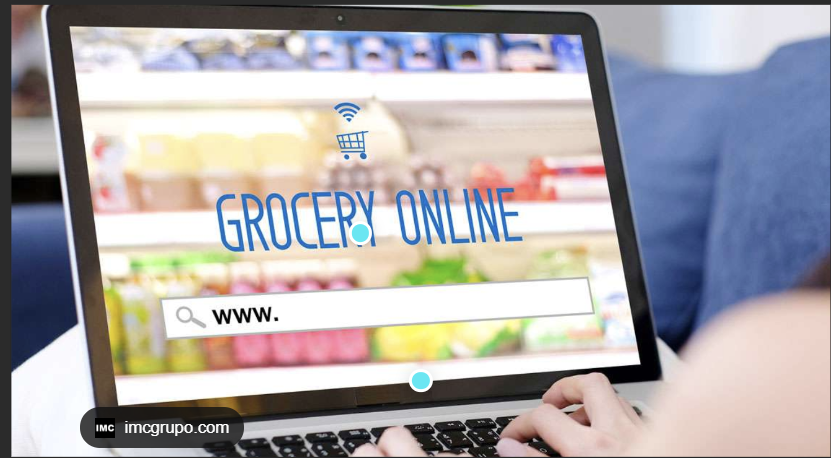

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("aisles.csv")
data1=pd.read_csv("departments.csv")
data2=pd.read_csv("order_products__prior.csv")
data3=pd.read_csv("orders.csv")
data4=pd.read_csv("products.csv")
data5=pd.read_csv("order_products__train.csv")

In [3]:
x=data.join(data1)

In [4]:
data

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
data1

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
data2

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [7]:
data3

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [8]:
data4

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [9]:
data5

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


# EDA

In [10]:
df1 = pd.merge(data, data4, how='inner', on='aisle_id')
df2 = pd.merge(df1, data1, how='inner', on='department_id')
df3 = pd.merge(data5, df2, how='inner', on='product_id')
df4 = pd.merge(data3, df3, how='inner', on='order_id')

In [11]:
df4

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1187899,1,train,11,4,8,14.0,49235,10,1,53,cream,Organic Half & Half,16,dairy eggs
1,1187899,1,train,11,4,8,14.0,46149,11,1,77,soft drinks,Zero Calorie Cola,7,beverages
2,1187899,1,train,11,4,8,14.0,196,1,1,77,soft drinks,Soda,7,beverages
3,1187899,1,train,11,4,8,14.0,27845,9,0,84,milk,Organic Whole Milk,16,dairy eggs
4,1187899,1,train,11,4,8,14.0,38928,3,1,120,yogurt,0% Greek Strained Yogurt,16,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,train,14,6,14,30.0,6846,1,1,77,soft drinks,Diet Pepsi Pack,7,beverages
1384613,272231,206209,train,14,6,14,30.0,40603,4,0,75,laundry,Fabric Softener Sheets,17,household
1384614,272231,206209,train,14,6,14,30.0,37966,7,0,112,bread,French Baguette Bread,3,bakery
1384615,272231,206209,train,14,6,14,30.0,15655,5,0,45,candy chocolate,Dark Chocolate Mint Snacking Chocolate,19,snacks


In [12]:
df = df4.drop(['aisle_id','department_id','eval_set','order_number'],axis=1)
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs



Inference: The Datset consists of 11 features & 1384617 samples.


In [13]:
pd.DataFrame(df)

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,6,14,30.0,6846,1,1,soft drinks,Diet Pepsi Pack,beverages
1384613,272231,206209,6,14,30.0,40603,4,0,laundry,Fabric Softener Sheets,household
1384614,272231,206209,6,14,30.0,37966,7,0,bread,French Baguette Bread,bakery
1384615,272231,206209,6,14,30.0,15655,5,0,candy chocolate,Dark Chocolate Mint Snacking Chocolate,snacks


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_dow               1384617 non-null  int64  
 3   order_hour_of_day       1384617 non-null  int64  
 4   days_since_prior_order  1384617 non-null  float64
 5   product_id              1384617 non-null  int64  
 6   add_to_cart_order       1384617 non-null  int64  
 7   reordered               1384617 non-null  int64  
 8   aisle                   1384617 non-null  object 
 9   product_name            1384617 non-null  object 
 10  department              1384617 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 116.2+ MB


In [15]:
df.columns

Index(['order_id', 'user_id', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'aisle', 'product_name', 'department'],
      dtype='object')

In [16]:
df.shape

(1384617, 11)

In [17]:
df.nunique().sort_values()

reordered                      2
order_dow                      7
department                    21
order_hour_of_day             24
days_since_prior_order        31
add_to_cart_order             80
aisle                        134
product_id                 39123
product_name               39123
order_id                  131209
user_id                   131209
dtype: int64

In [18]:
df.describe()

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,1.031128e+05,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,5.948715e+04,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,5.173200e+04,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,1.029330e+05,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,1.549590e+05,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,8.000000e+01,1.000000e+00


In [19]:
df.shape

(1384617, 11)

## VISUALIZATION

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
print(type(df['department']))


<class 'pandas.core.series.Series'>


In [23]:
df['department'] = pd.Series(df['department'])


In [24]:
print(df['department'].unique())


['dairy eggs' 'beverages' 'snacks' 'household' 'breakfast' 'produce'
 'frozen' 'deli' 'canned goods' 'personal care' 'international' 'pantry'
 'meat seafood' 'bakery' 'other' 'alcohol' 'dry goods pasta' 'pets'
 'babies' 'bulk' 'missing']


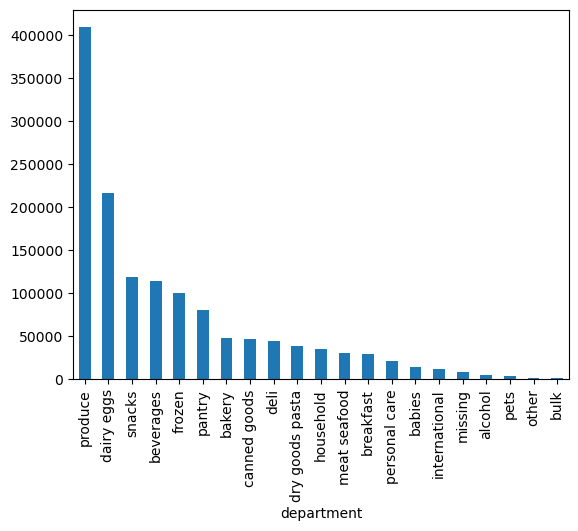

In [25]:
import matplotlib.pyplot as plt
df['department'].value_counts().plot(kind='bar')
plt.show()


In [26]:
g=df['aisle'].loc[:20]
pd.DataFrame(g)

,aisle
0,cream
1,soft drinks
2,soft drinks
3,milk
4,yogurt
5,popcorn jerky
6,candy chocolate
7,paper goods
8,nuts seeds dried fruit
9,cereal


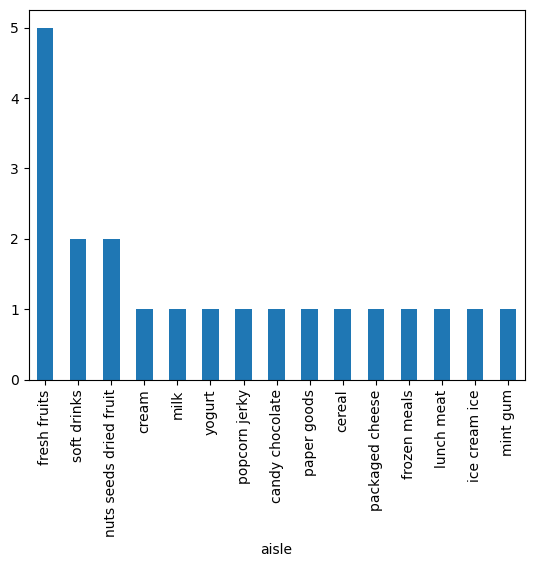

In [27]:
import matplotlib.pyplot as plt
g.value_counts().plot(kind='bar')
plt.show()



In [28]:
prod=df['product_name'].loc[:20]
pd.DataFrame(prod)

,product_name
0,Organic Half & Half
1,Zero Calorie Cola
2,Soda
3,Organic Whole Milk
4,0% Greek Strained Yogurt
5,Aged White Cheddar Popcorn
6,Milk Chocolate Almonds
7,XL Pick-A-Size Paper Towel Rolls
8,Pistachios
9,Cinnamon Toast Crunch


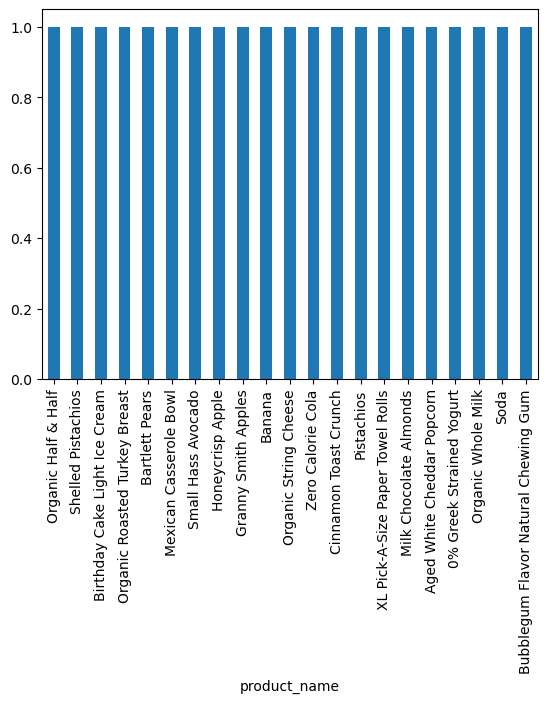

In [29]:
import matplotlib.pyplot as plt
prod.value_counts().plot(kind='bar')
plt.show()



In [30]:
# sns.countplot(df.order_hour_of_day)#, order=df.aisle.value_counts().index[:20])
# plt.title('Online Shopping Horly-Frequency')
# plt.xticks(rotation=90)
# plt.show()

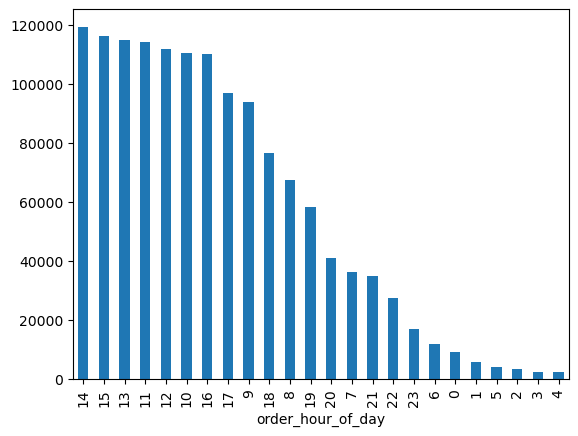

In [31]:
import matplotlib.pyplot as plt
df['order_hour_of_day'].value_counts().plot(kind='bar')
plt.show()



In [32]:
df.isnull().sum()

order_id                  0
user_id                   0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
aisle                     0
product_name              0
department                0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [33]:
dummies_df = pd.get_dummies(data=df, prefix=['Day','Hour'], columns=['order_dow','order_hour_of_day'], drop_first=True)
dummies_df.head()

,order_id,user_id,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department,Day_1,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1187899,1,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs,False,...,False,False,False,False,False,False,False,False,False,False
1,1187899,1,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages,False,...,False,False,False,False,False,False,False,False,False,False
2,1187899,1,14.0,196,1,1,soft drinks,Soda,beverages,False,...,False,False,False,False,False,False,False,False,False,False
3,1187899,1,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs,False,...,False,False,False,False,False,False,False,False,False,False
4,1187899,1,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# #Final Dataset size after performing Preprocessing

# plt.title('Final Dataset Samples')
# plt.pie([df1.shape[0], df1.shape[0]-df.shape[0]], radius = 1, shadow=True,
#         labels=['Retained','Dropped'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
# plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
# plt.show()

# print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

In [34]:
user_prod_df = dummies_df.groupby(['user_id','product_id']).agg({'order_id':'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'max',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_prod_df.head()

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
user_purchase_df = dummies_df.groupby(['user_id']).agg({         'order_id':'nunique',
                                                                 'product_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_purchase_df.head()

,user_id,order_id,product_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,11,14.0,10,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,31,30.0,12,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,9,6.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,9,6.0,8,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,18,10.0,4,18,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [36]:
product_purchase_df = dummies_df.groupby(['product_id']).agg({   'order_id':'nunique',
                                                                 'user_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'reordered':'sum',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Hour_1':'sum',
                                                                 'Hour_2':'sum',
                                                                 'Hour_3':'sum',
                                                                 'Hour_4':'sum',
                                                                 'Hour_5':'sum',
                                                                 'Hour_6':'sum',
                                                                 'Hour_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
product_purchase_df.head()

,product_id,order_id,user_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,76,76,17.118421,49,14,14,10,13,14,...,5,3,4,8,1,3,0,1,4,0
1,2,4,4,10.750000,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,6,6,21.000000,6,0,0,2,0,2,...,0,0,2,0,0,0,0,0,0,0
3,4,22,22,17.272727,14,2,5,3,1,1,...,3,2,3,2,3,2,0,0,0,1
4,5,1,1,21.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
temp = pd.merge(left=user_prod_df,  right=user_purchase_df, on='user_id', suffixes=('','_user'))
temp.head(10)

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_user,Hour_15_user,Hour_16_user,Hour_17_user,Hour_18_user,Hour_19_user,Hour_20_user,Hour_21_user,Hour_22_user,Hour_23_user
0,1,196,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10258,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13032,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25133,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,26088,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,26405,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,27845,1,14.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,38928,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,39657,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,46149,1,14.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
features_df = pd.merge(left=temp,  right=product_purchase_df, on='product_id', suffixes=('','_prod'))
features_df.head(10)

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,1,196,1,14.0,1,0,0,0,1,0,...,135,124,78,79,56,42,25,34,22,16
1,67,196,1,5.0,1,0,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
2,676,196,1,26.0,1,0,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
3,760,196,1,8.0,1,0,0,0,1,0,...,135,124,78,79,56,42,25,34,22,16
4,804,196,1,5.0,0,0,0,1,0,0,...,135,124,78,79,56,42,25,34,22,16
5,865,196,1,30.0,0,0,0,0,0,1,...,135,124,78,79,56,42,25,34,22,16
6,992,196,1,30.0,1,0,0,0,0,1,...,135,124,78,79,56,42,25,34,22,16
7,1306,196,1,6.0,1,0,0,0,0,1,...,135,124,78,79,56,42,25,34,22,16
8,1512,196,1,27.0,0,1,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
9,1550,196,1,30.0,1,1,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16


In [39]:
def my_reset(varnames):
    """
    varnames are what you want to keep
    """
    globals_ = globals()
    to_save = {v: globals_[v] for v in varnames}
    to_save['my_reset'] = my_reset  # lets keep this function by default
    del globals_
    get_ipython().magic("reset")
    globals().update(to_save)
    
variables = ['features_df']
my_reset(variables)

C:\Users\RITESH\AppData\Local\Temp\ipykernel_9376\1829360097.py:9: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic("reset")


Once deleted, variables cannot be recovered. Proceed (y/[n])? b
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [41]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [42]:
import numpy as np
reduce_features_df = reduce_mem_usage(features_df)

Memory usage of dataframe is 1056.38 MB
Memory usage after optimization is: 179.58 MB
Decreased by 83.0%


In [43]:
reduce_features_df.isnull().sum().sort_values()

user_id                        0
Day_2_prod                     0
Day_1_prod                     0
reordered_prod                 0
days_since_prior_order_prod    0
                              ..
Hour_18                        0
Hour_17                        0
Hour_16                        0
days_since_prior_order_user    0
Hour_23_prod                   0
Length: 100, dtype: int64

In [44]:
reduced_feature= reduce_features_df[:1000]
reduced_feature

,user_id,product_id,order_id,days_since_prior_order,reordered,Day_1,Day_2,Day_3,Day_4,Day_5,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,1,196,1,14.0,1,0,0,0,1,0,...,135,124,78,79,56,42,25,34,22,16
1,67,196,1,5.0,1,0,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
2,676,196,1,26.0,1,0,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
3,760,196,1,8.0,1,0,0,0,1,0,...,135,124,78,79,56,42,25,34,22,16
4,804,196,1,5.0,0,0,0,1,0,0,...,135,124,78,79,56,42,25,34,22,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136086,196,1,16.0,0,0,0,1,0,0,...,135,124,78,79,56,42,25,34,22,16
996,136300,196,1,7.0,1,0,0,0,0,0,...,135,124,78,79,56,42,25,34,22,16
997,136331,196,1,27.0,1,0,0,1,0,0,...,135,124,78,79,56,42,25,34,22,16
998,136414,196,1,2.0,1,0,0,0,1,0,...,135,124,78,79,56,42,25,34,22,16


In [47]:
from sklearn.model_selection import train_test_split

# Assuming reduced_feature is your feature matrix or dataset
# You have already imported train_test_split from scikit-learn

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(reduced_feature, test_size=0.3, random_state=100)

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (700, 100)
Shape of X_test: (300, 100)


In [48]:
# Building Neareset Neighbours Classifier with Cosine distance measure

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(X_train)

NearestNeighbors(algorithm='brute', metric='cosine')

In [49]:
import numpy as np
query_index = np.random.choice(X_train.shape[0])
distances, indices = model_knn.kneighbors(X_train.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

j=1
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X_train.index[indices.flatten()[i]]))
    else:
        try:
            print('{0}: {1}'.format(j, df1[df1['product_id']==X_train.index[indices.flatten()[i]]].product_name.values[0]))
            j+=1
        except:
            pass

Recommendations for 419:



C:\Users\RITESH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
# 6. Project Outcomes & Conclusions
# Here are some of the key outcomes of the project:
# The Dataset was quiet large with combined data totally around 1.3M.
# There were also few outliers & no duplicates present in the datset, which had to be dropped.
# Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
# Further filtering was done with threshold for the number of user id's & product id's.
# Finally Nearest Neighbours Algorithm was employed to get the similar Groceries Recommendations based on the Cosine Similarity.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have target labels for training and testing sets
# Assuming y_train and y_test are your target labels

# Instantiate the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", accuracy)


NameError: name 'y_train' is not defined

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming reduced_feature contains both features and the target variable
# Assuming the target variable is the last column

# Separate features (X) and the target variable (y)
X = reduced_feature.iloc[:, :-1]  # Assuming the target variable is in the last column
y = reduced_feature.iloc[:, -1]   # Assuming the target variable is in the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Instantiate the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", accuracy)


Accuracy on the testing set: 1.0


In [53]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
model = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set:", accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0
Accuracy on the testing set: 1.0


Classification Report:
              precision    recall  f1-score   support

          16       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



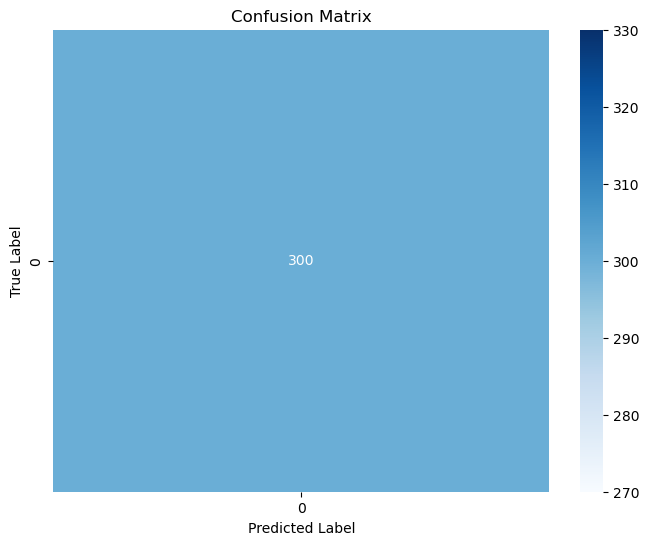

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [63]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and made predictions
# Let's say your predictions are stored in y_pred and your true labels are in y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 1.0
